In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
data = pd.read_csv('C:\\Users\\lenovo\\OneDrive\\Documents\\Blood data.csv')


In [14]:
data.shape


(172, 12)

In [15]:
data.isnull().sum()


SAMPLE                  0
ID                      0
MEAL TIME               0
GLUCOMETER  READING     0
940(R)                  0
940(T)                  0
1050(R)                 0
1300(R)                 0
MALE                    0
FEMALE                  0
AGE                     0
OUTCOME                 0
dtype: int64

In [16]:
data.duplicated().sum()


0

In [17]:
data.head()


,SAMPLE,ID,MEAL TIME,GLUCOMETER READING,940(R),940(T),1050(R),1300(R),MALE,FEMALE,AGE,OUTCOME
0,174,10172,1,127,31759,31892,22499,14299,0,1,21,0
1,2,10001,0,103,10328,3560,17418,14566,1,0,31,0
2,170,10168,1,103,31791,31742,21230,20400,0,1,23,0
3,167,10165,1,95,31792,31924,17437,9635,0,1,22,0
4,121,10119,1,152,31726,31876,15872,15160,1,0,72,0


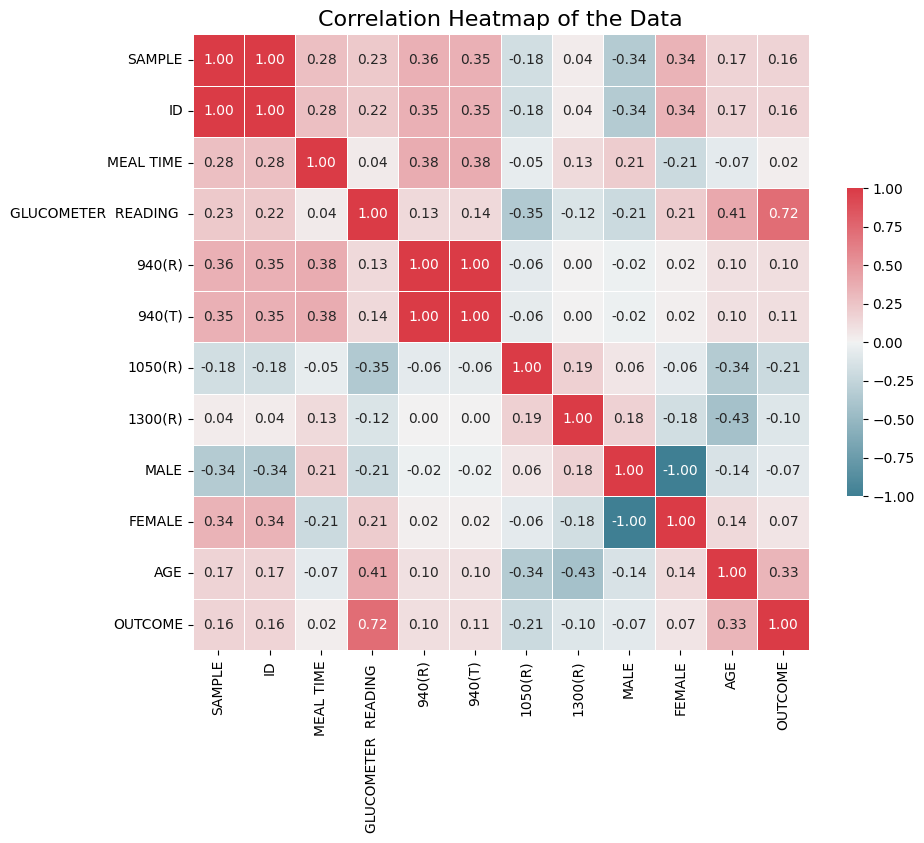

In [18]:
import seaborn as sns
# Compute the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap=cmap, center=0,
            annot=True, fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap of the Data', fontsize=16)
plt.show()


In [19]:
# Compute the correlation matrix
correlation_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool_))

# Find index of feature columns with correlation greater than 0.3
highly_correlated_features = [column for column in upper.columns if any(upper[column] > 0.3)]


In [20]:
# Print highly correlated features
print("Highly correlated features:")
print(highly_correlated_features)
     


Highly correlated features:
['ID', '940(R)', '940(T)', '1050(R)', 'MALE', 'FEMALE', 'AGE', 'OUTCOME']


In [21]:
X = data.drop(['OUTCOME'], axis=1)
y = data.OUTCOME

IndexError: index 9 is out of bounds for axis 0 with size 9

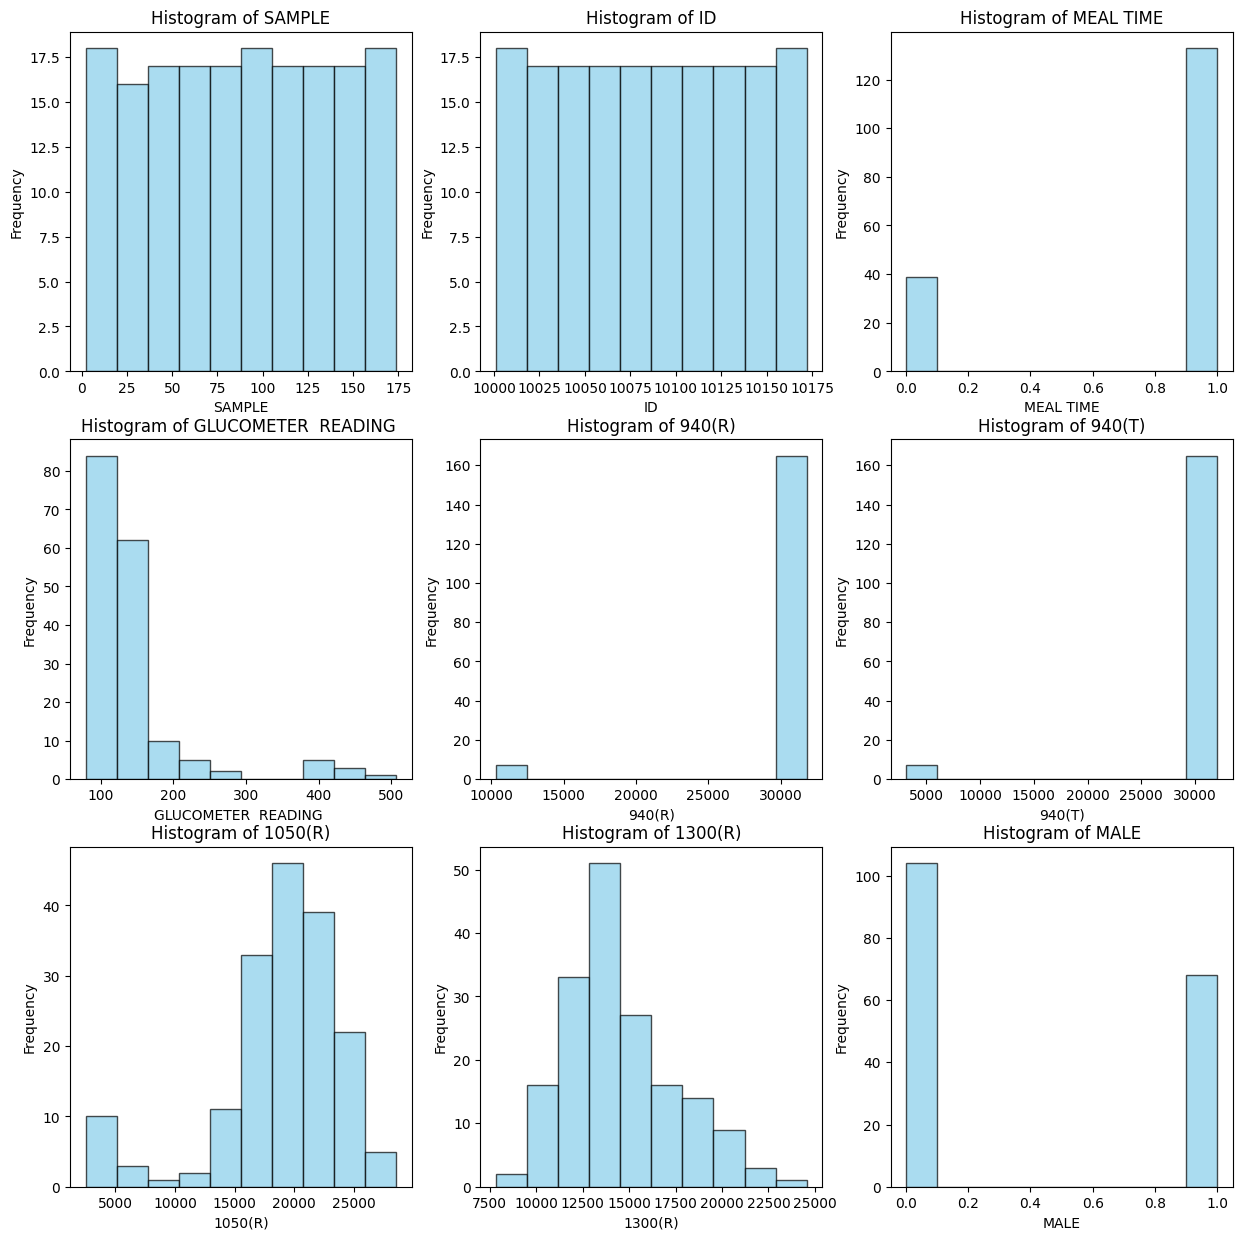

In [22]:
import matplotlib.pyplot as plt
# Plotting histograms for each feature
features = X.columns

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()

for i, feature in enumerate(features):
    axs[i].hist(X[feature], bins=10, alpha=0.7, color='skyblue', edgecolor='black')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()

In [23]:
y.value_counts()


OUTCOME
0    138
1     34
Name: count, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
     

<function matplotlib.pyplot.show(close=None, block=None)>

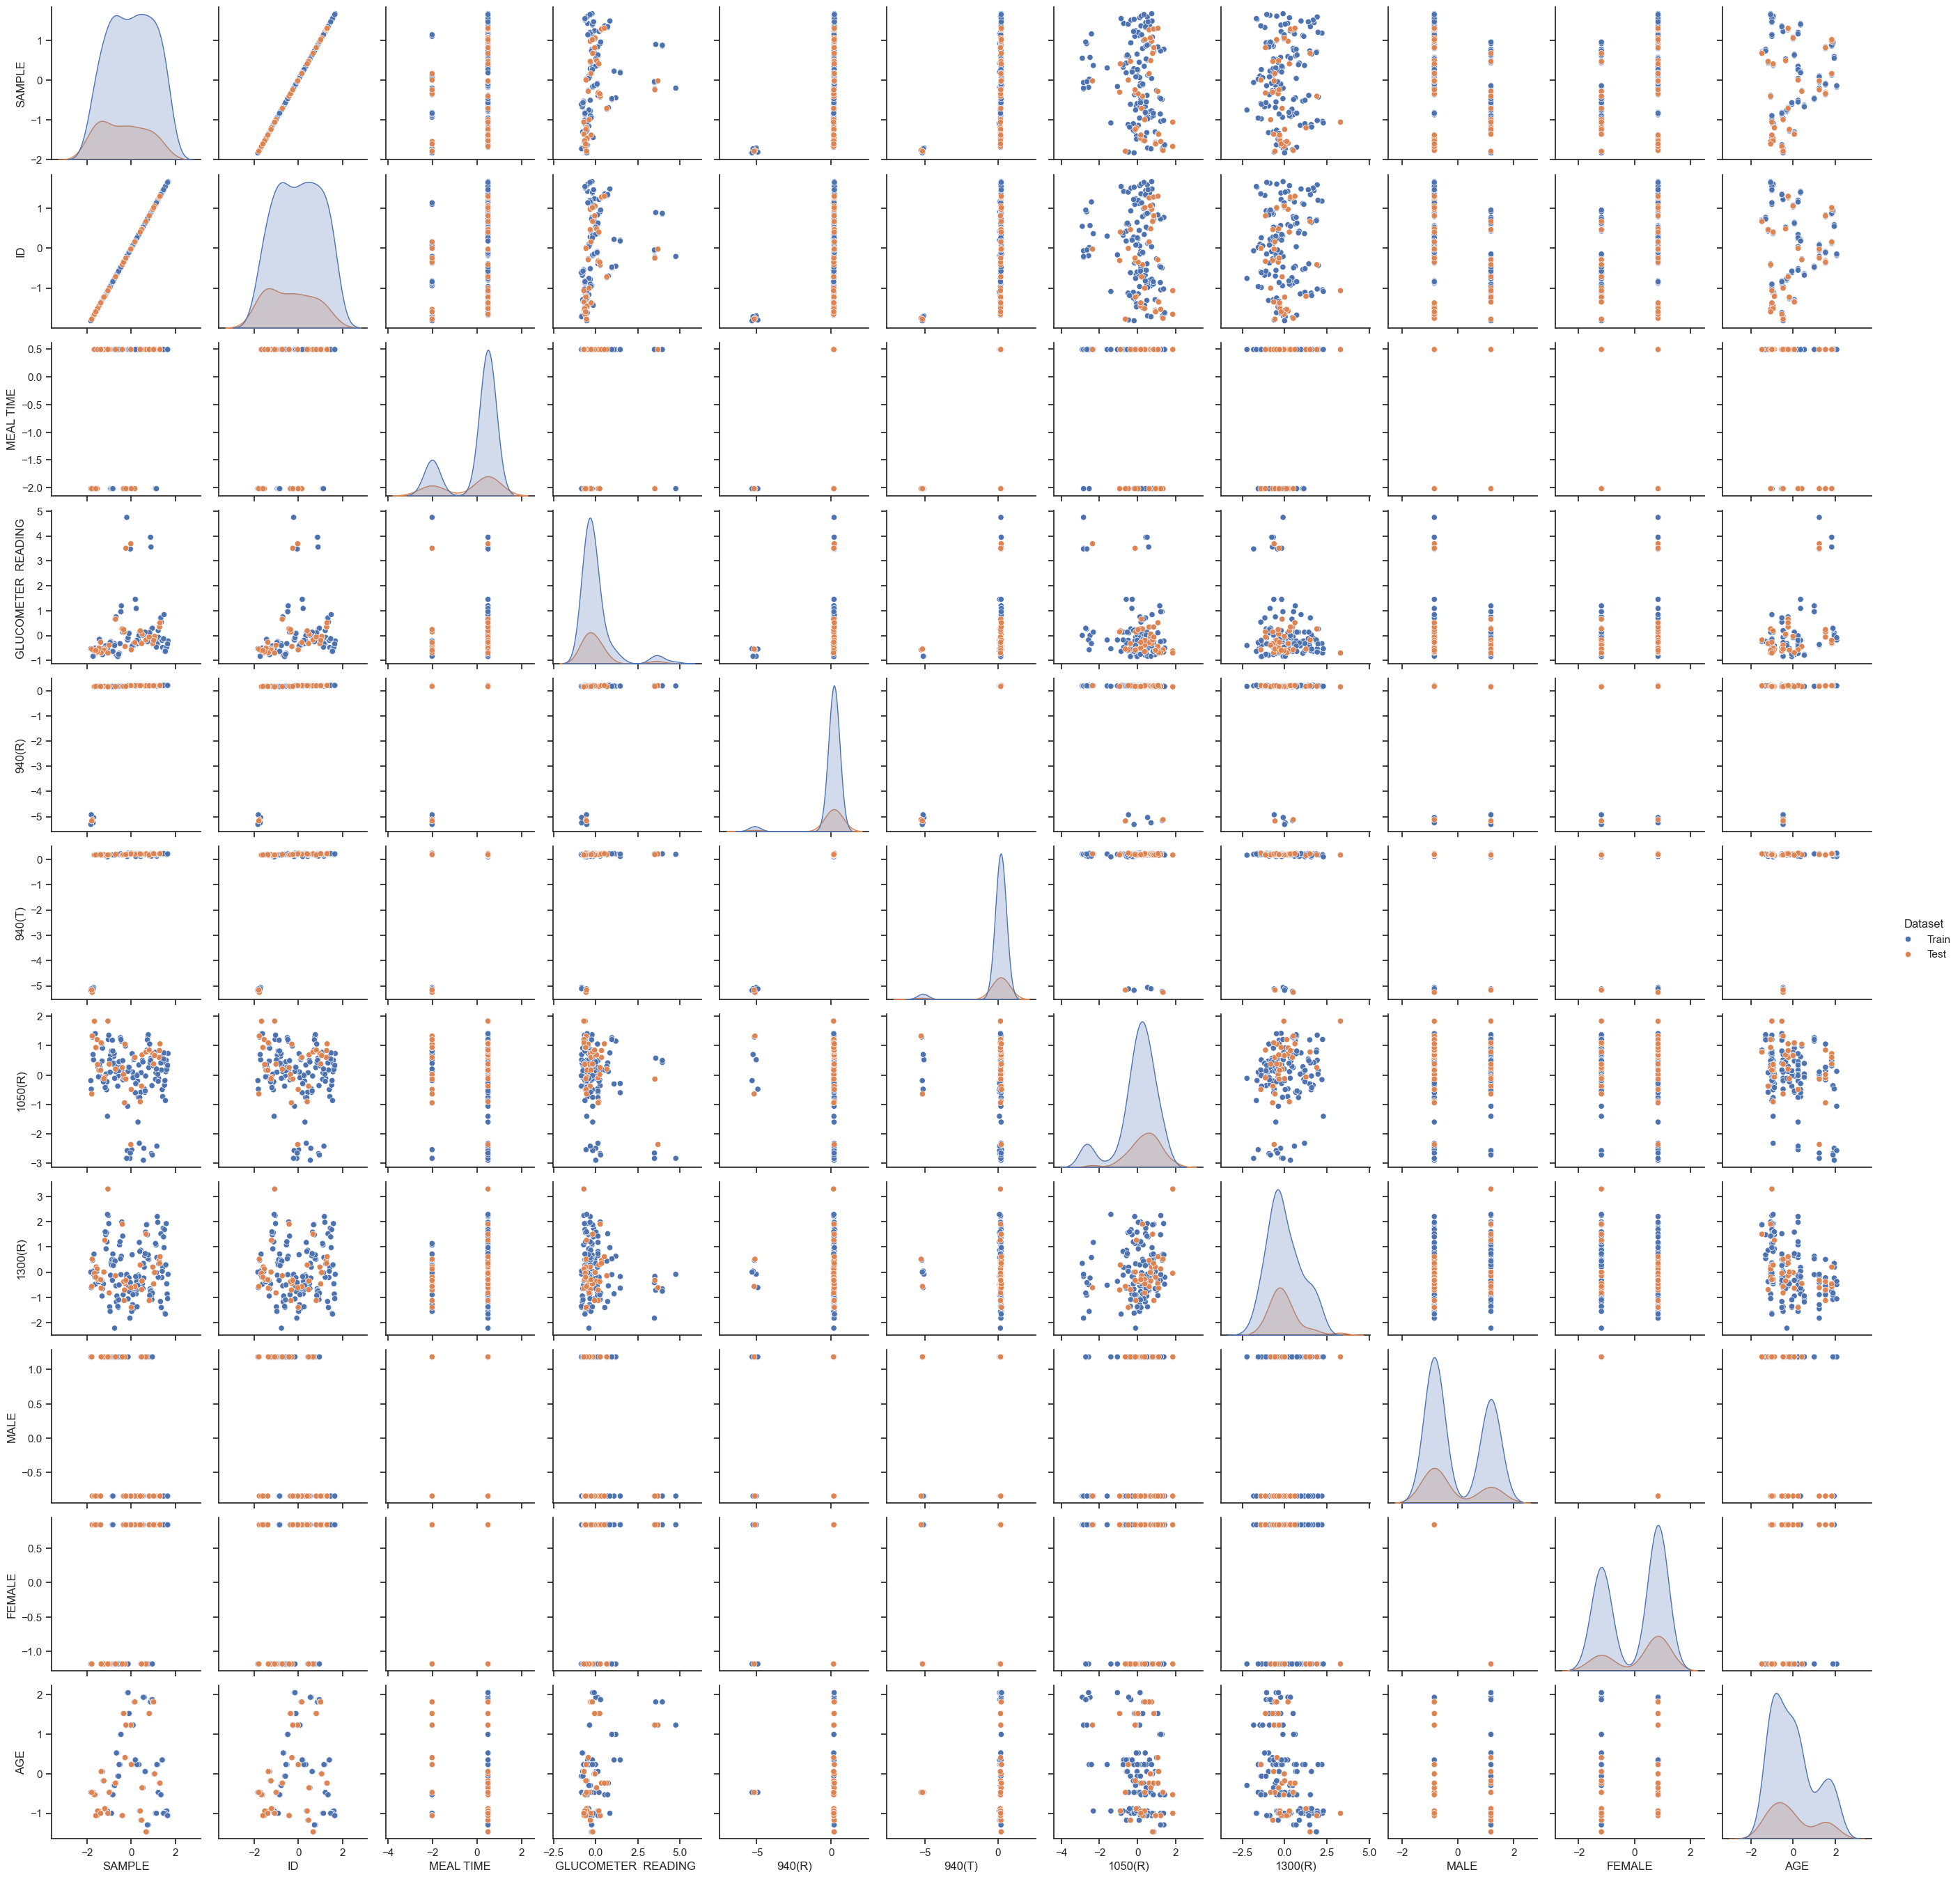

In [26]:
import seaborn as sns
# Convert the arrays back to dataframes
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Combine the training and testing dataframes for visualization
X_train_df['Dataset'] = 'Train'
X_test_df['Dataset'] = 'Test'
combined_df = pd.concat([X_train_df, X_test_df], axis=0)

# Create pairplot using Seaborn
sns.set(style="ticks")
sns.pairplot(combined_df, hue="Dataset")
plt.show

In [27]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
     

Accuracy: 0.9428571428571428

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.80      0.89        10

    accuracy                           0.94        35
   macro avg       0.96      0.90      0.93        35
weighted avg       0.95      0.94      0.94        35


Confusion Matrix:
 [[25  0]
 [ 2  8]]


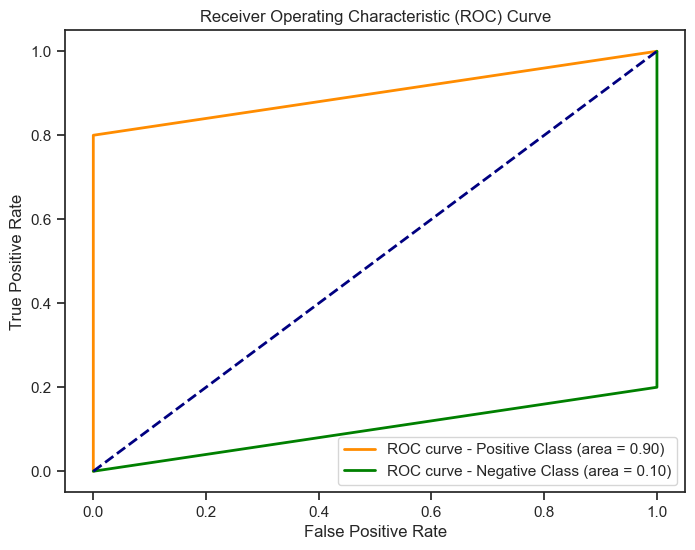

In [28]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


# Compute predicted probabilities
y_pred_prob = model.predict_proba(X_test)

# Compute ROC curve and ROC area for both classes
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])

# Compute ROC curve and ROC area for the negative class
fpr_neg, tpr_neg, thresholds_neg = roc_curve(y_test, y_pred_prob[:, 0])
roc_auc_neg = roc_auc_score(y_test, y_pred_prob[:, 0])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve - Positive Class (area = %0.2f)' % roc_auc)
plt.plot(fpr_neg, tpr_neg, color='green', lw=2, label='ROC curve - Negative Class (area = %0.2f)' % roc_auc_neg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [29]:
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
     

Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88        25
           1       1.00      0.30      0.46        10

    accuracy                           0.80        35
   macro avg       0.89      0.65      0.67        35
weighted avg       0.84      0.80      0.76        35


Confusion Matrix:
 [[25  0]
 [ 7  3]]


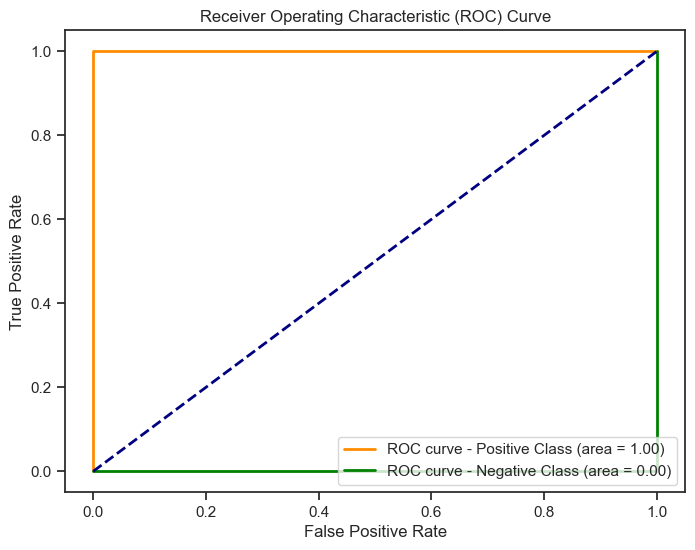

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


# Compute predicted probabilities
y_pred_prob = model.predict_proba(X_test)

# Compute ROC curve and ROC area for both classes
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])

# Compute ROC curve and ROC area for the negative class
fpr_neg, tpr_neg, thresholds_neg = roc_curve(y_test, y_pred_prob[:, 0])
roc_auc_neg = roc_auc_score(y_test, y_pred_prob[:, 0])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve - Positive Class (area = %0.2f)' % roc_auc)
plt.plot(fpr_neg, tpr_neg, color='green', lw=2, label='ROC curve - Negative Class (area = %0.2f)' % roc_auc_neg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
     

In [31]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9428571428571428

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.80      0.89        10

    accuracy                           0.94        35
   macro avg       0.96      0.90      0.93        35
weighted avg       0.95      0.94      0.94        35


Confusion Matrix:
 [[25  0]
 [ 2  8]]


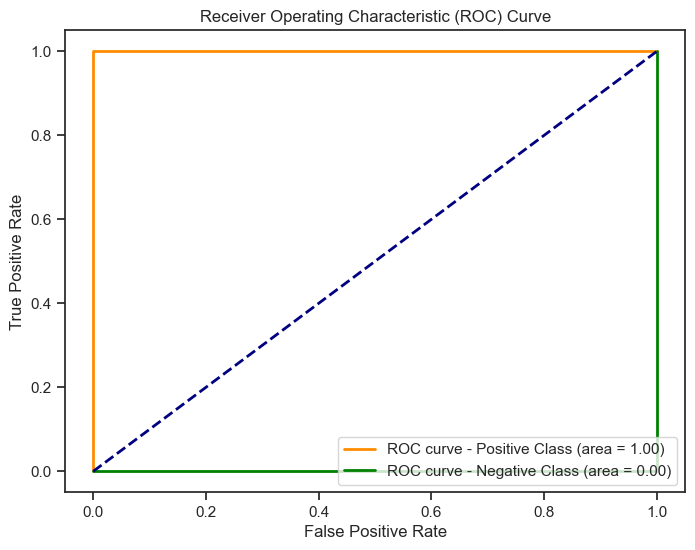

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


# Compute predicted probabilities
y_pred_prob = model.predict_proba(X_test)

# Compute ROC curve and ROC area for both classes
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])

# Compute ROC curve and ROC area for the negative class
fpr_neg, tpr_neg, thresholds_neg = roc_curve(y_test, y_pred_prob[:, 0])
roc_auc_neg = roc_auc_score(y_test, y_pred_prob[:, 0])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve - Positive Class (area = %0.2f)' % roc_auc)
plt.plot(fpr_neg, tpr_neg, color='green', lw=2, label='ROC curve - Negative Class (area = %0.2f)' % roc_auc_neg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

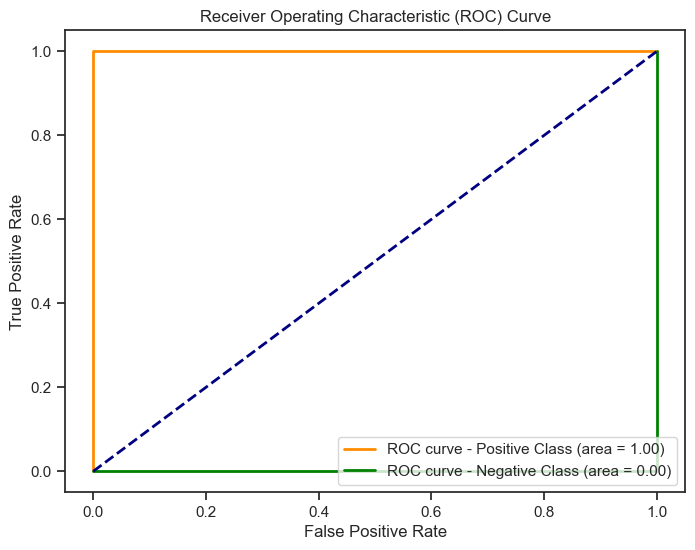

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


# Compute predicted probabilities
y_pred_prob = model.predict_proba(X_test)

# Compute ROC curve and ROC area for both classes
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])

# Compute ROC curve and ROC area for the negative class
fpr_neg, tpr_neg, thresholds_neg = roc_curve(y_test, y_pred_prob[:, 0])
roc_auc_neg = roc_auc_score(y_test, y_pred_prob[:, 0])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve - Positive Class (area = %0.2f)' % roc_auc)
plt.plot(fpr_neg, tpr_neg, color='green', lw=2, label='ROC curve - Negative Class (area = %0.2f)' % roc_auc_neg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [34]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred)
print(f"R-squared value = {r2}")

R-squared value = 0.72


In [35]:
!pip install arize

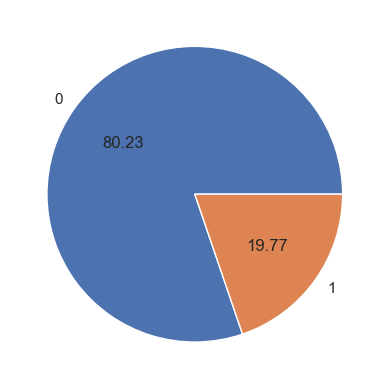

In [36]:
plt.pie(data.groupby(by=["OUTCOME"]).size(), labels = data["OUTCOME"].unique(), autopct = "%0.2f")
plt.show()

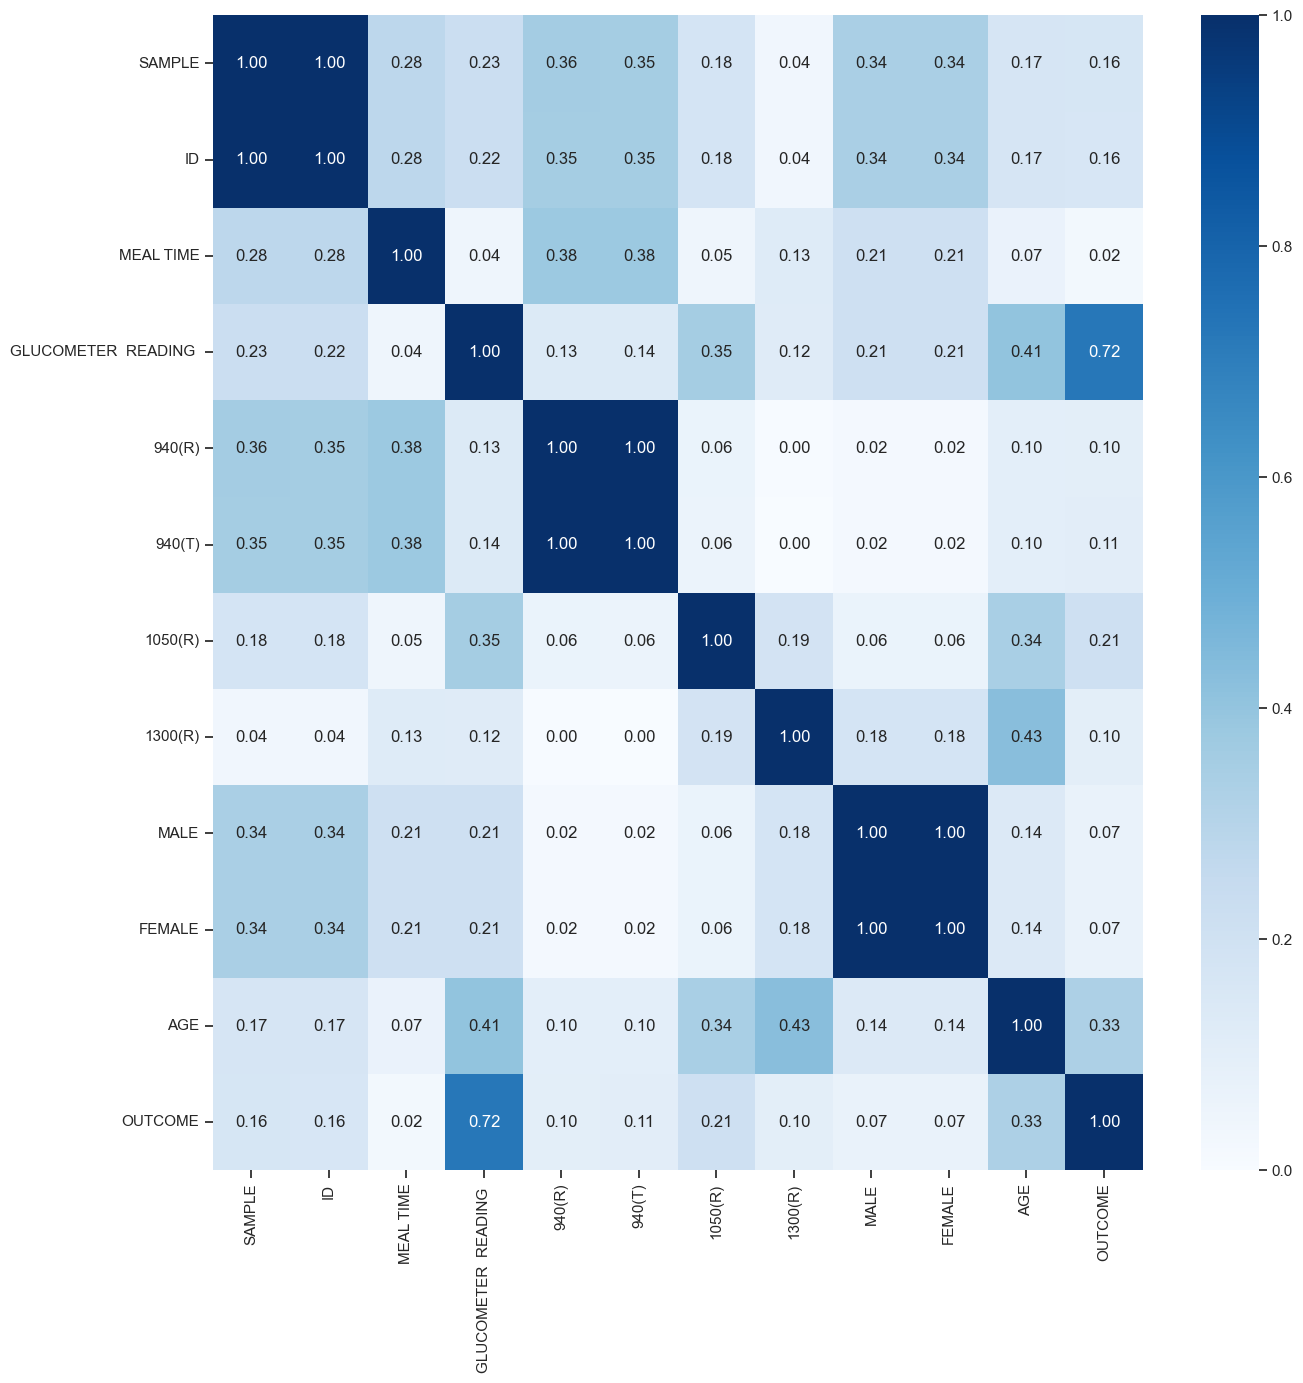

In [39]:
corr=abs(data.corr())
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, vmin=0, vmax=1, cmap='Blues', fmt='.2f')
plt.show()

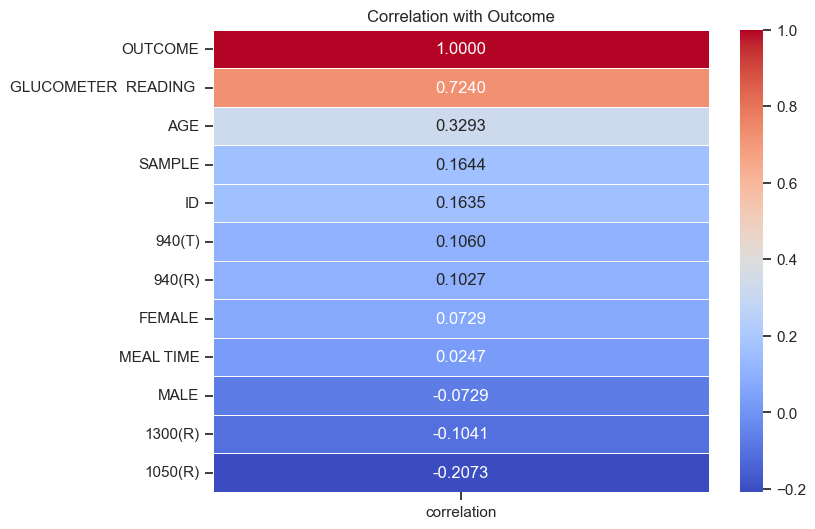

In [40]:
corr = data.corrwith(data['OUTCOME']).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(corr , columns=['correlation']), annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5)
plt.title('Correlation with Outcome')
plt.show()

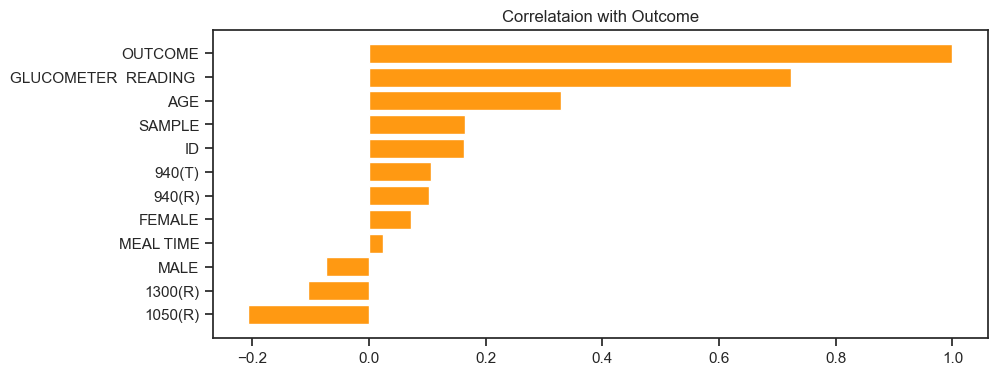

In [41]:
corr = plt.figure(figsize = (10, 4))
outcome_corr = pd.DataFrame(data.corr()['OUTCOME'].sort_values(ascending = True))
plt.barh(outcome_corr.index, outcome_corr['OUTCOME'],color="#FF9912")
plt.title('Correlataion with Outcome')
plt.show()

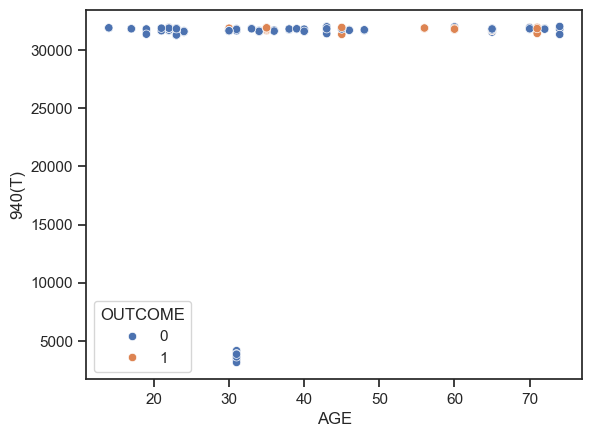

In [42]:
sns.scatterplot(x="AGE", y="940(T)", hue="OUTCOME", data=data)
plt.show()

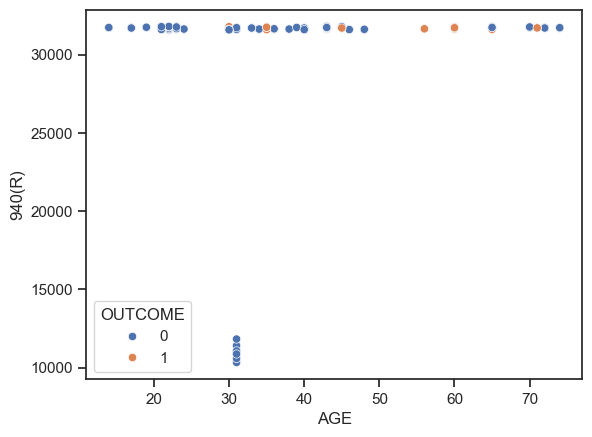

In [43]:
sns.scatterplot(x="AGE", y="940(R)", hue="OUTCOME", data=data)
plt.show()

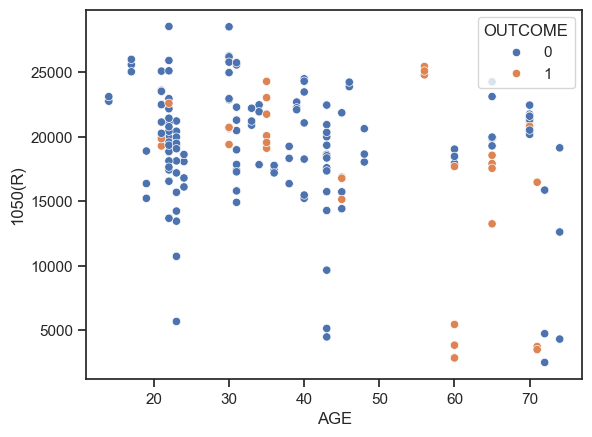

In [44]:
sns.scatterplot(x="AGE", y="1050(R)", hue="OUTCOME", data=data)
plt.show()

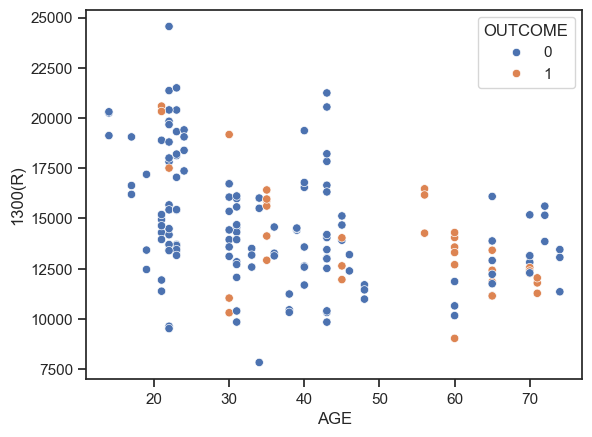

In [45]:
sns.scatterplot(x="AGE", y="1300(R)", hue="OUTCOME", data=data)
plt.show()